# Análisis Exploratorio de Datos (EDA)

## Importamos librerías

In [27]:
from pathlib import Path 
import numpy as np 
import pandas as pd 
import pyarrow as pa
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import subprocess
import itertools

## Load Data

In [28]:
DATA_DIR = Path.cwd()/ "data"

melbourne_df = pd.read_parquet(
    DATA_DIR / "02_intermediate/melbourne_type_fixed.parquet", engine="pyarrow"
)

### Data Description

In [29]:
melbourne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57770 entries, 0 to 57769
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Longtitude     44562 non-null  float64       
 1   BuildingArea   22866 non-null  float64       
 2   Type           57768 non-null  category      
 3   SellerG        57768 non-null  category      
 4   Distance       57766 non-null  float64       
 5   Landsize       38207 non-null  float64       
 6   Postcode       57766 non-null  float64       
 7   Date           57768 non-null  datetime64[ns]
 8   Price          45189 non-null  float64       
 9   Bathroom       44143 non-null  Int64         
 10  Rooms          57768 non-null  Int64         
 11  Regionname     57764 non-null  category      
 12  Car            43293 non-null  Int64         
 13  CouncilArea    57764 non-null  category      
 14  Address        57768 non-null  category      
 15  Method         5776

In [30]:
melbourne_df.shape

(57770, 21)

In [31]:
# Convertir columnas categóricas nuevamente a tipo "category"
cols_categoric = ["Type", "SellerG", "Regionname", "CouncilArea", "Method", "Suburb", "Address", "Postcode"]

melbourne_df[cols_categoric] = melbourne_df[cols_categoric].astype("category")

In [32]:
melbourne_df.sample(5)

Longtitude  BuildingArea Type        SellerG  Distance  Landsize  \
22098   145.06460           NaN    u       Anderson      11.4       0.0   
8236    144.86860         194.0    t          Barry      12.8     289.0   
51138   144.97850          85.0    u       Woodards       3.5    4332.0   
47471   144.89770           NaN    h          Raine       8.0     297.0   
6518    145.04567          90.0    u  hockingstuart       7.3       NaN   

      Postcode       Date      Price  Bathroom  ...             Regionname  \
22098   3163.0 2017-11-03        NaN         1  ...  Southern Metropolitan   
8236    3033.0 2016-11-19        NaN         2  ...   Western Metropolitan   
51138   3068.0 2016-03-09   700000.0         2  ...  Northern Metropolitan   
47471   3016.0 2017-02-25  1337500.0         1  ...   Western Metropolitan   
6518    3146.0 2017-09-23   678000.0         1  ...  Southern Metropolitan   

      Car               CouncilArea        Address Method Propertycount  \
22098   1    Glen Eira City Council  6/9 Acacia St     PI          7822   
8236    1     Brimbank City Council   42 Clarks Rd      S          5629   
51138   1     Moreland City Council   233/4 Bik La     SP          6244   
47471   0  Hobsons Bay City Council   81 Parker St     SP          6380   
6518    1   Boroondara City Council  8/34 Edgar St      S         10412   

       Bedroom2  Lattitude  YearBuilt         Suburb  
22098         1  -37.88570       <NA>       Carnegie  
8236          3  -37.73670       2009    Keilor East  
51138         2  -37.78460       2010  Fitzroy North  
47471         2  -37.86450       <NA>   Williamstown  
6518          2  -37.85501       1970      Glen Iris  

[5 rows x 21 columns]

In [33]:
nulos_df = (melbourne_df.isnull().sum() / len(melbourne_df) * 100).round(2)
pd.DataFrame({
    "Null count": melbourne_df.isnull().sum(),
    "Null %": nulos_df,
    "Dtype": melbourne_df.dtypes
})

Null count  Null %           Dtype
Longtitude          13208   22.86         float64
BuildingArea        34904   60.42         float64
Type                    2    0.00        category
SellerG                 2    0.00        category
Distance                4    0.01         float64
Landsize            19563   33.86         float64
Postcode                4    0.01        category
Date                    2    0.00  datetime64[ns]
Price               12581   21.78         float64
Bathroom            13627   23.59           Int64
Rooms                   2    0.00           Int64
Regionname              6    0.01        category
Car                 14477   25.06           Int64
CouncilArea             6    0.01        category
Address                 2    0.00        category
Method                  2    0.00        category
Propertycount           6    0.01           Int64
Bedroom2            13615   23.57           Int64
Lattitude           13208   22.86         float64
YearBuilt           31927   55.27           Int64
Suburb                  2    0.00        category

Target Variable: Price

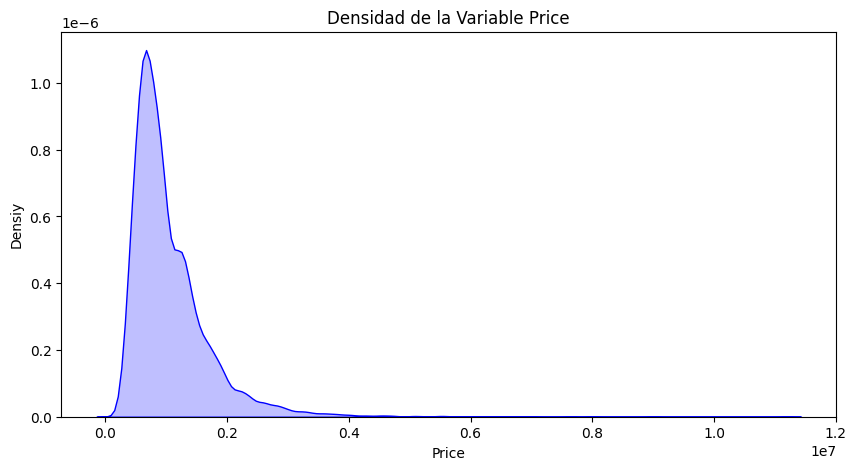

In [34]:
plt.figure(figsize=(10, 5))
sns.kdeplot(melbourne_df["Price"], fill=True, color="blue")
plt.xlabel("Price")
plt.ylabel("Densiy")
plt.title("Densidad de la Variable Price")
plt.show()

In [35]:
melbourne_df.duplicated().sum()

np.int64(29886)

En los registros tenemos 57770 datos y de estos, 29886 son nulos. Esto representa el 51.73% del dataset

In [36]:
melbourne_df.drop_duplicates(inplace=True, keep="first")
melbourne_df.duplicated().sum()

np.int64(0)

In [37]:
melbourne_df.set_index("Date", inplace=True)

In [38]:
melbourne_df.describe()

Longtitude  BuildingArea      Distance       Landsize         Price  \
count  21525.000000  11038.000000  27882.000000   18461.000000  2.181600e+04   
mean     145.001438    157.328827     11.185363     604.667082  1.055527e+06   
std        0.120299    140.364924      6.808772    3746.270218  6.474201e+05   
min      144.431620      0.000000      0.000000       0.000000  8.500000e+04   
25%      144.933100    102.000000      6.400000     225.000000  6.375000e+05   
50%      145.007200    136.000000     10.300000     523.000000  8.760000e+05   
75%      145.071900    188.000000     14.000000     670.000000  1.300000e+06   
max      145.526350   6791.000000     48.100000  433014.000000  1.120000e+07   

       Bathroom     Rooms       Car  Propertycount  Bedroom2     Lattitude  \
count   21322.0   27883.0   20913.0        27881.0   21328.0  21525.000000   
mean   1.624472  3.033354  1.728494     7573.12001  3.084537    -37.810618   
std    0.721475  0.972563  1.014065    4423.153411  0.968936      0.090421   
min         0.0       1.0       0.0           83.0       0.0    -38.190430   
25%         1.0       2.0       1.0         4385.0       2.0    -37.862520   
50%         2.0       3.0       2.0         6763.0       3.0    -37.807720   
75%         2.0       4.0       2.0        10412.0       4.0    -37.754700   
max         9.0      16.0      26.0        21650.0      20.0    -37.390200   

         YearBuilt  
count      12468.0  
mean   1965.025906  
std      37.703736  
min         1196.0  
25%         1940.0  
50%         1970.0  
75%         2000.0  
max         2106.0

In [39]:
# Aplicar condiciones para identificar outliers y reemplazarlos con NaN
melbourne_df.loc[~((melbourne_df["Price"] > 100000) & (melbourne_df["Price"] < 3000000)), "Price"] = np.nan
melbourne_df.loc[~((melbourne_df["BuildingArea"] > 20) & (melbourne_df["BuildingArea"] < 500)), "BuildingArea"] = np.nan
melbourne_df.loc[~((melbourne_df["Landsize"] > 50) & (melbourne_df["Landsize"] < 5000)), "Landsize"] = np.nan
melbourne_df.loc[~((melbourne_df["Distance"] > 0.5) & (melbourne_df["Distance"] < 50)), "Distance"] = np.nan

# Contar los registros modificados
num_outliers = melbourne_df.isna().any(axis=1).sum()
print(f"Número de registros que NO cumplen las condiciones {num_outliers} de {melbourne_df.shape[0]} posibles")

Número de registros que NO cumplen las condiciones 21810 de 27884 posibles


In [40]:
print(melbourne_df.isna().sum())


Longtitude        6359
BuildingArea     17087
Type                 1
SellerG              1
Distance            59
Landsize         11475
Postcode             2
Price             6454
Bathroom          6562
Rooms                1
Regionname           3
Car               6971
CouncilArea          3
Address              1
Method               1
Propertycount        3
Bedroom2          6556
Lattitude         6359
YearBuilt        15416
Suburb               1
dtype: int64


## Análisis Univariable

### Numeric Variables

In [41]:
numerical_columns = list(melbourne_df.select_dtypes(include=["number"]).columns)
numerical_columns

['Longtitude',
 'BuildingArea',
 'Distance',
 'Landsize',
 'Price',
 'Bathroom',
 'Rooms',
 'Car',
 'Propertycount',
 'Bedroom2',
 'Lattitude',
 'YearBuilt']

In [42]:
melbourne_df.describe()

Longtitude  BuildingArea      Distance      Landsize         Price  \
count  21525.000000  10797.000000  27825.000000  16409.000000  2.143000e+04   
mean     145.001438    152.930235     11.208277    558.767323  1.004617e+06   
std        0.120299     73.339979      6.796875    415.340126  5.115966e+05   
min      144.431620     22.000000      0.700000     53.000000  1.210000e+05   
25%      144.933100    103.000000      6.400000    306.000000  6.320000e+05   
50%      145.007200    136.000000     10.300000    556.000000  8.650000e+05   
75%      145.071900    187.000000     14.000000    689.000000  1.274250e+06   
max      145.526350    496.000000     48.100000   4977.000000  2.990000e+06   

       Bathroom     Rooms       Car  Propertycount  Bedroom2     Lattitude  \
count   21322.0   27883.0   20913.0        27881.0   21328.0  21525.000000   
mean   1.624472  3.033354  1.728494     7573.12001  3.084537    -37.810618   
std    0.721475  0.972563  1.014065    4423.153411  0.968936      0.090421   
min         0.0       1.0       0.0           83.0       0.0    -38.190430   
25%         1.0       2.0       1.0         4385.0       2.0    -37.862520   
50%         2.0       3.0       2.0         6763.0       3.0    -37.807720   
75%         2.0       4.0       2.0        10412.0       4.0    -37.754700   
max         9.0      16.0      26.0        21650.0      20.0    -37.390200   

         YearBuilt  
count      12468.0  
mean   1965.025906  
std      37.703736  
min         1196.0  
25%         1940.0  
50%         1970.0  
75%         2000.0  
max         2106.0

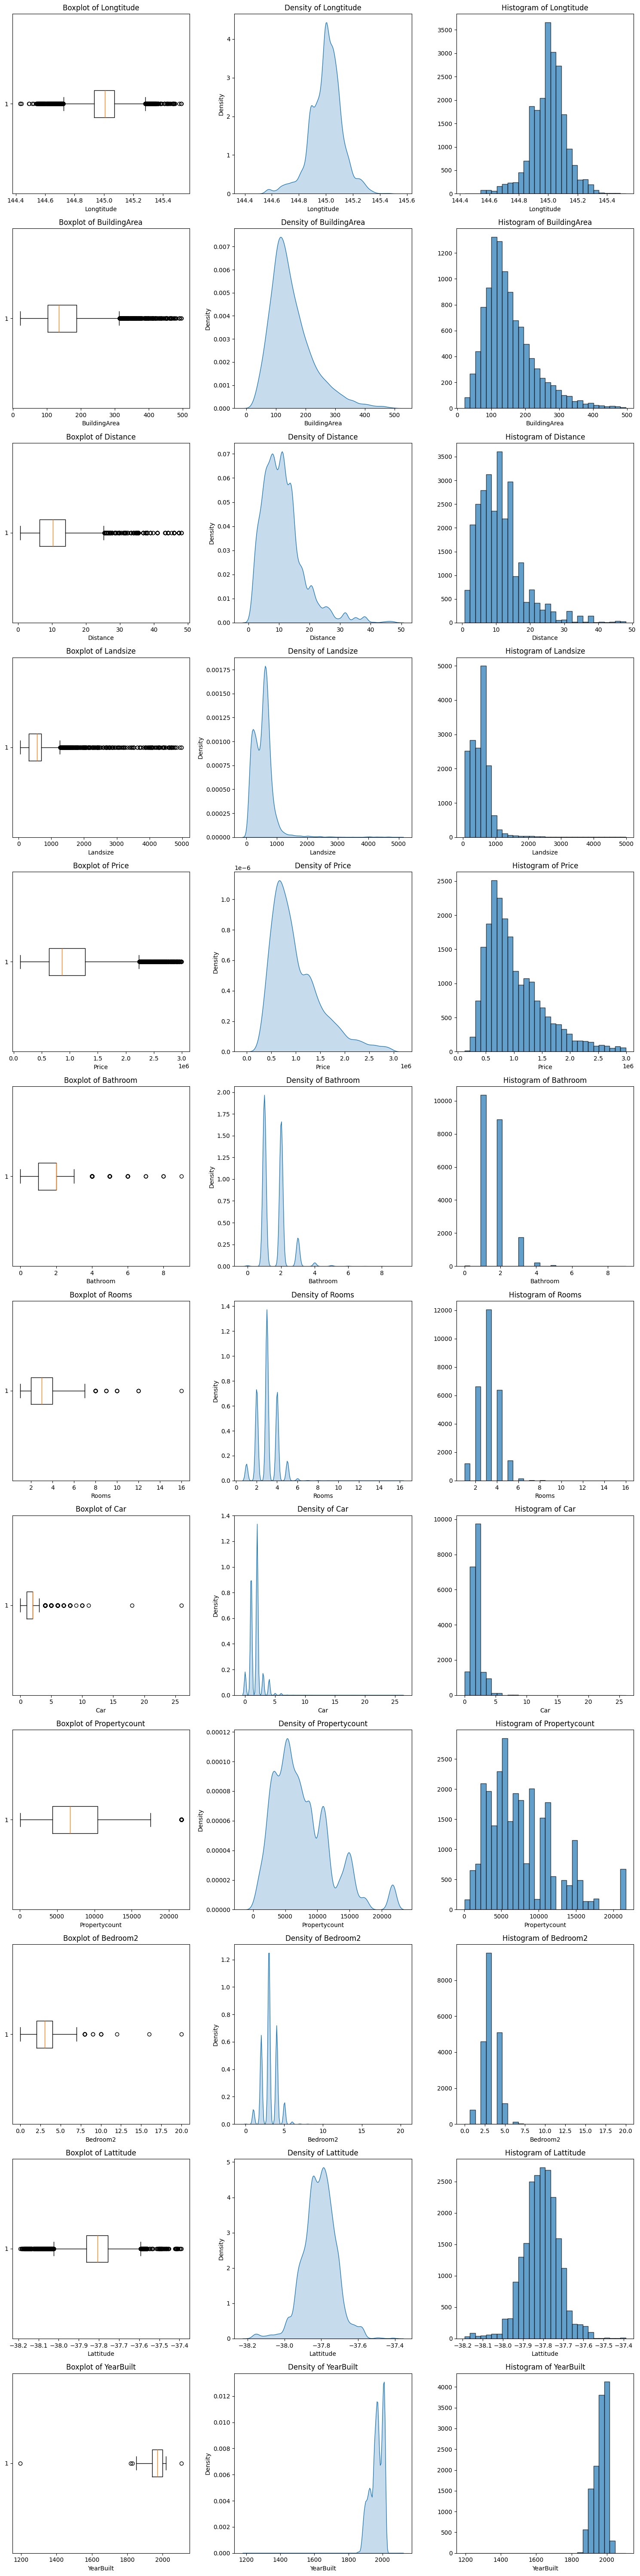

In [43]:
numeric_cols = melbourne_df.select_dtypes(include=["number"]).columns.tolist()

fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=3, figsize=(15, 5 * len(numeric_cols)), sharex=False, sharey=False)

for ax, col in zip(axes, numeric_cols):
    # Boxplot
    ax[0].boxplot(melbourne_df[col].dropna(), vert=False)
    ax[0].set_title(f"Boxplot of {col}")
    ax[0].set_xlabel(col)

    # Density Plot
    sns.kdeplot(melbourne_df[col].dropna(), fill=True, ax=ax[1])
    ax[1].set_title(f"Density of {col}")
    ax[1].set_xlabel(col)

    # Histogram
    ax[2].hist(melbourne_df[col].dropna(), bins=30, edgecolor="black", alpha=0.7)
    ax[2].set_title(f"Histogram of {col}")
    ax[2].set_xlabel(col)

plt.tight_layout()
plt.show()

### Categorical Variables

In [44]:
melbourne_df.describe(include="category")

Type SellerG  Postcode             Regionname  \
count   27883   27883   27882.0                  27881   
unique      3     363     208.0                      8   
top         h  Jellis    3073.0  Southern Metropolitan   
freq    19231    2730     672.0                   9480   

                    CouncilArea       Address Method     Suburb  
count                     27881         27883  27883      27883  
unique                       33         27304      9        347  
top     Boroondara City Council  5 Charles St      S  Reservoir  
freq                       2983             4  15793        672

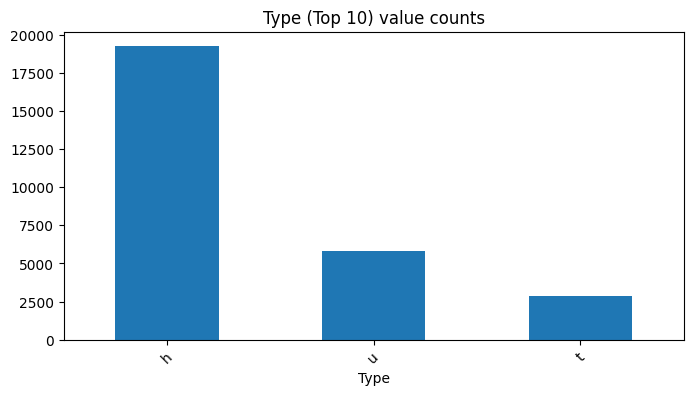

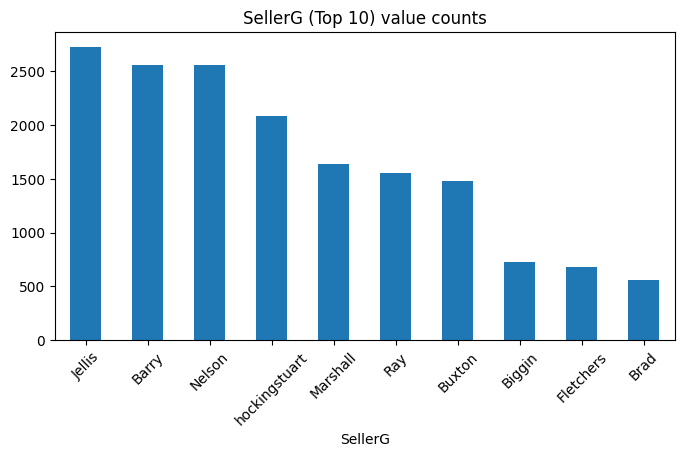

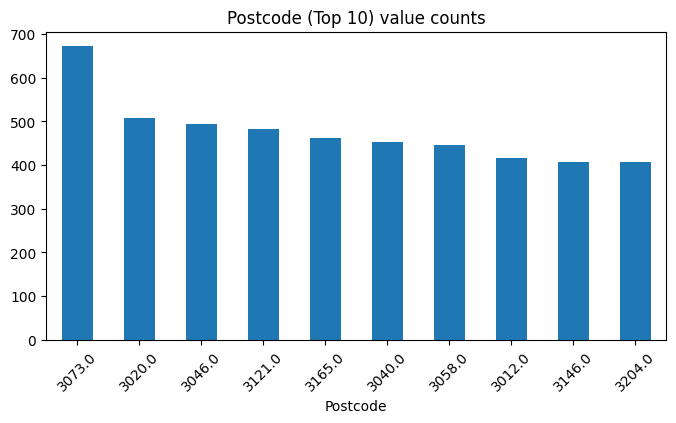

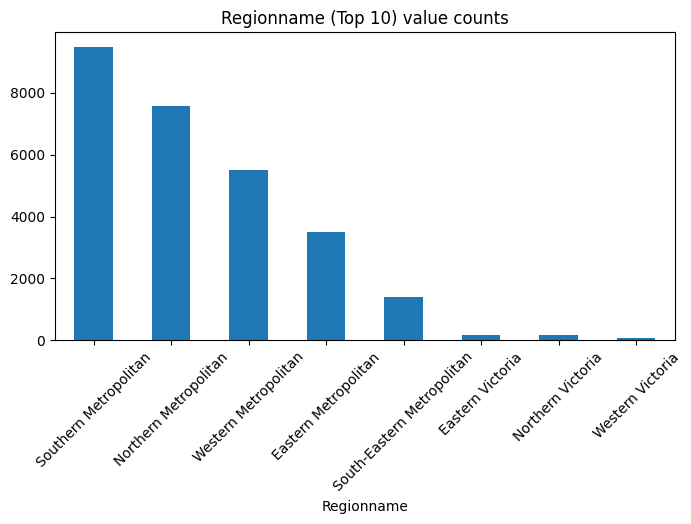

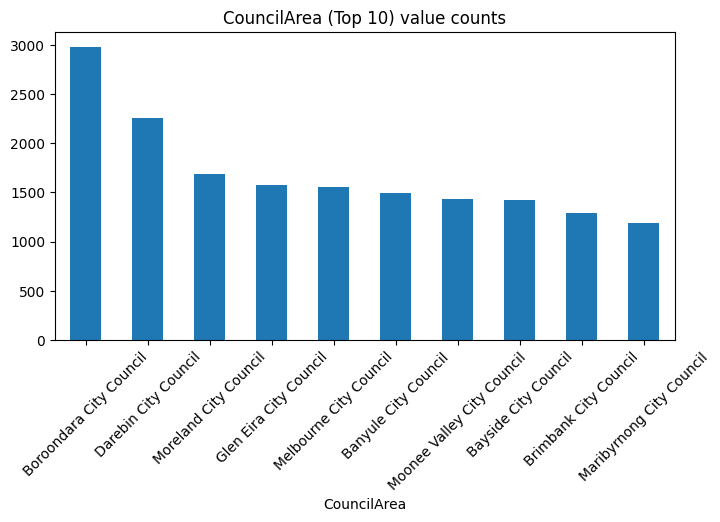

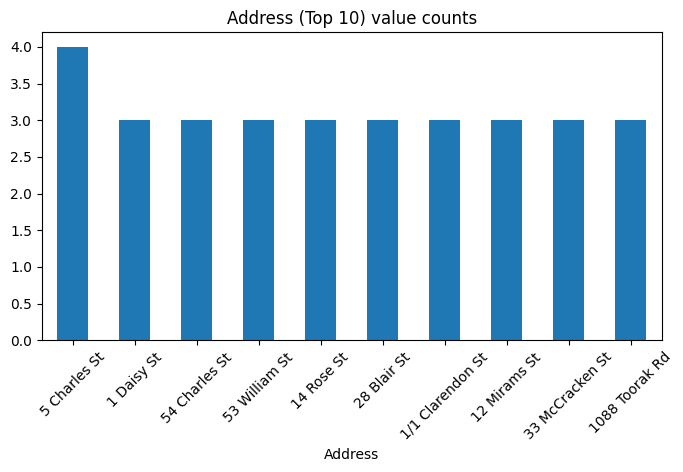

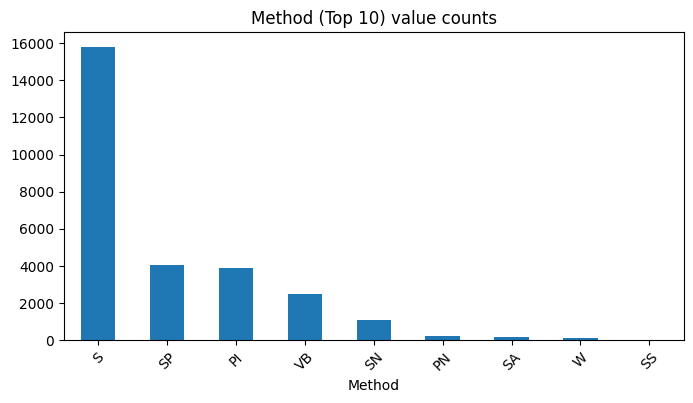

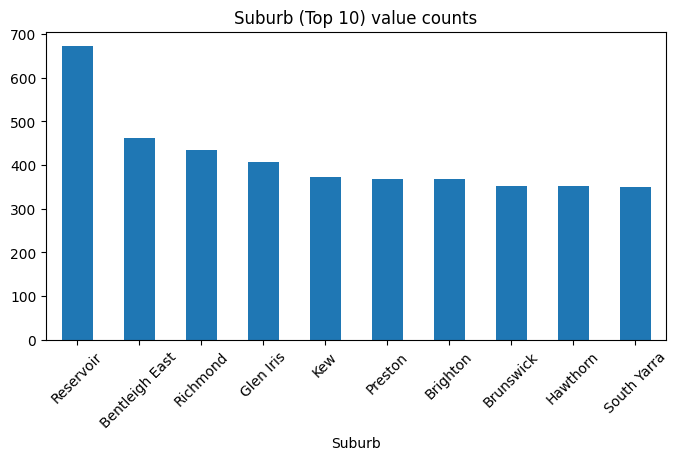

In [45]:
categorical_cols = melbourne_df.select_dtypes(include=["object", "category"]).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    melbourne_df[col].value_counts().nlargest(10).plot(
        kind="bar", title=f"{col} (Top 10) value counts"
    )
    plt.xticks(rotation=45)
    plt.show()


Se realiza el top 10 para graficar en barras debido a que hay variables como SellerG, PostCode, CouncilArea, Address y Suburb que harían que se dificulte la lectura de la gráfica y generan mucho ruido. Más adelnate decidiremos qué hacer con estas variables

In [46]:
melbourne_df.select_dtypes(include=["object", "category"]).nunique()


Type               3
SellerG          363
Postcode         208
Regionname         8
CouncilArea       33
Address        27304
Method             9
Suburb           347
dtype: int64

## Análisis Bivariable

### Target vs Numerical

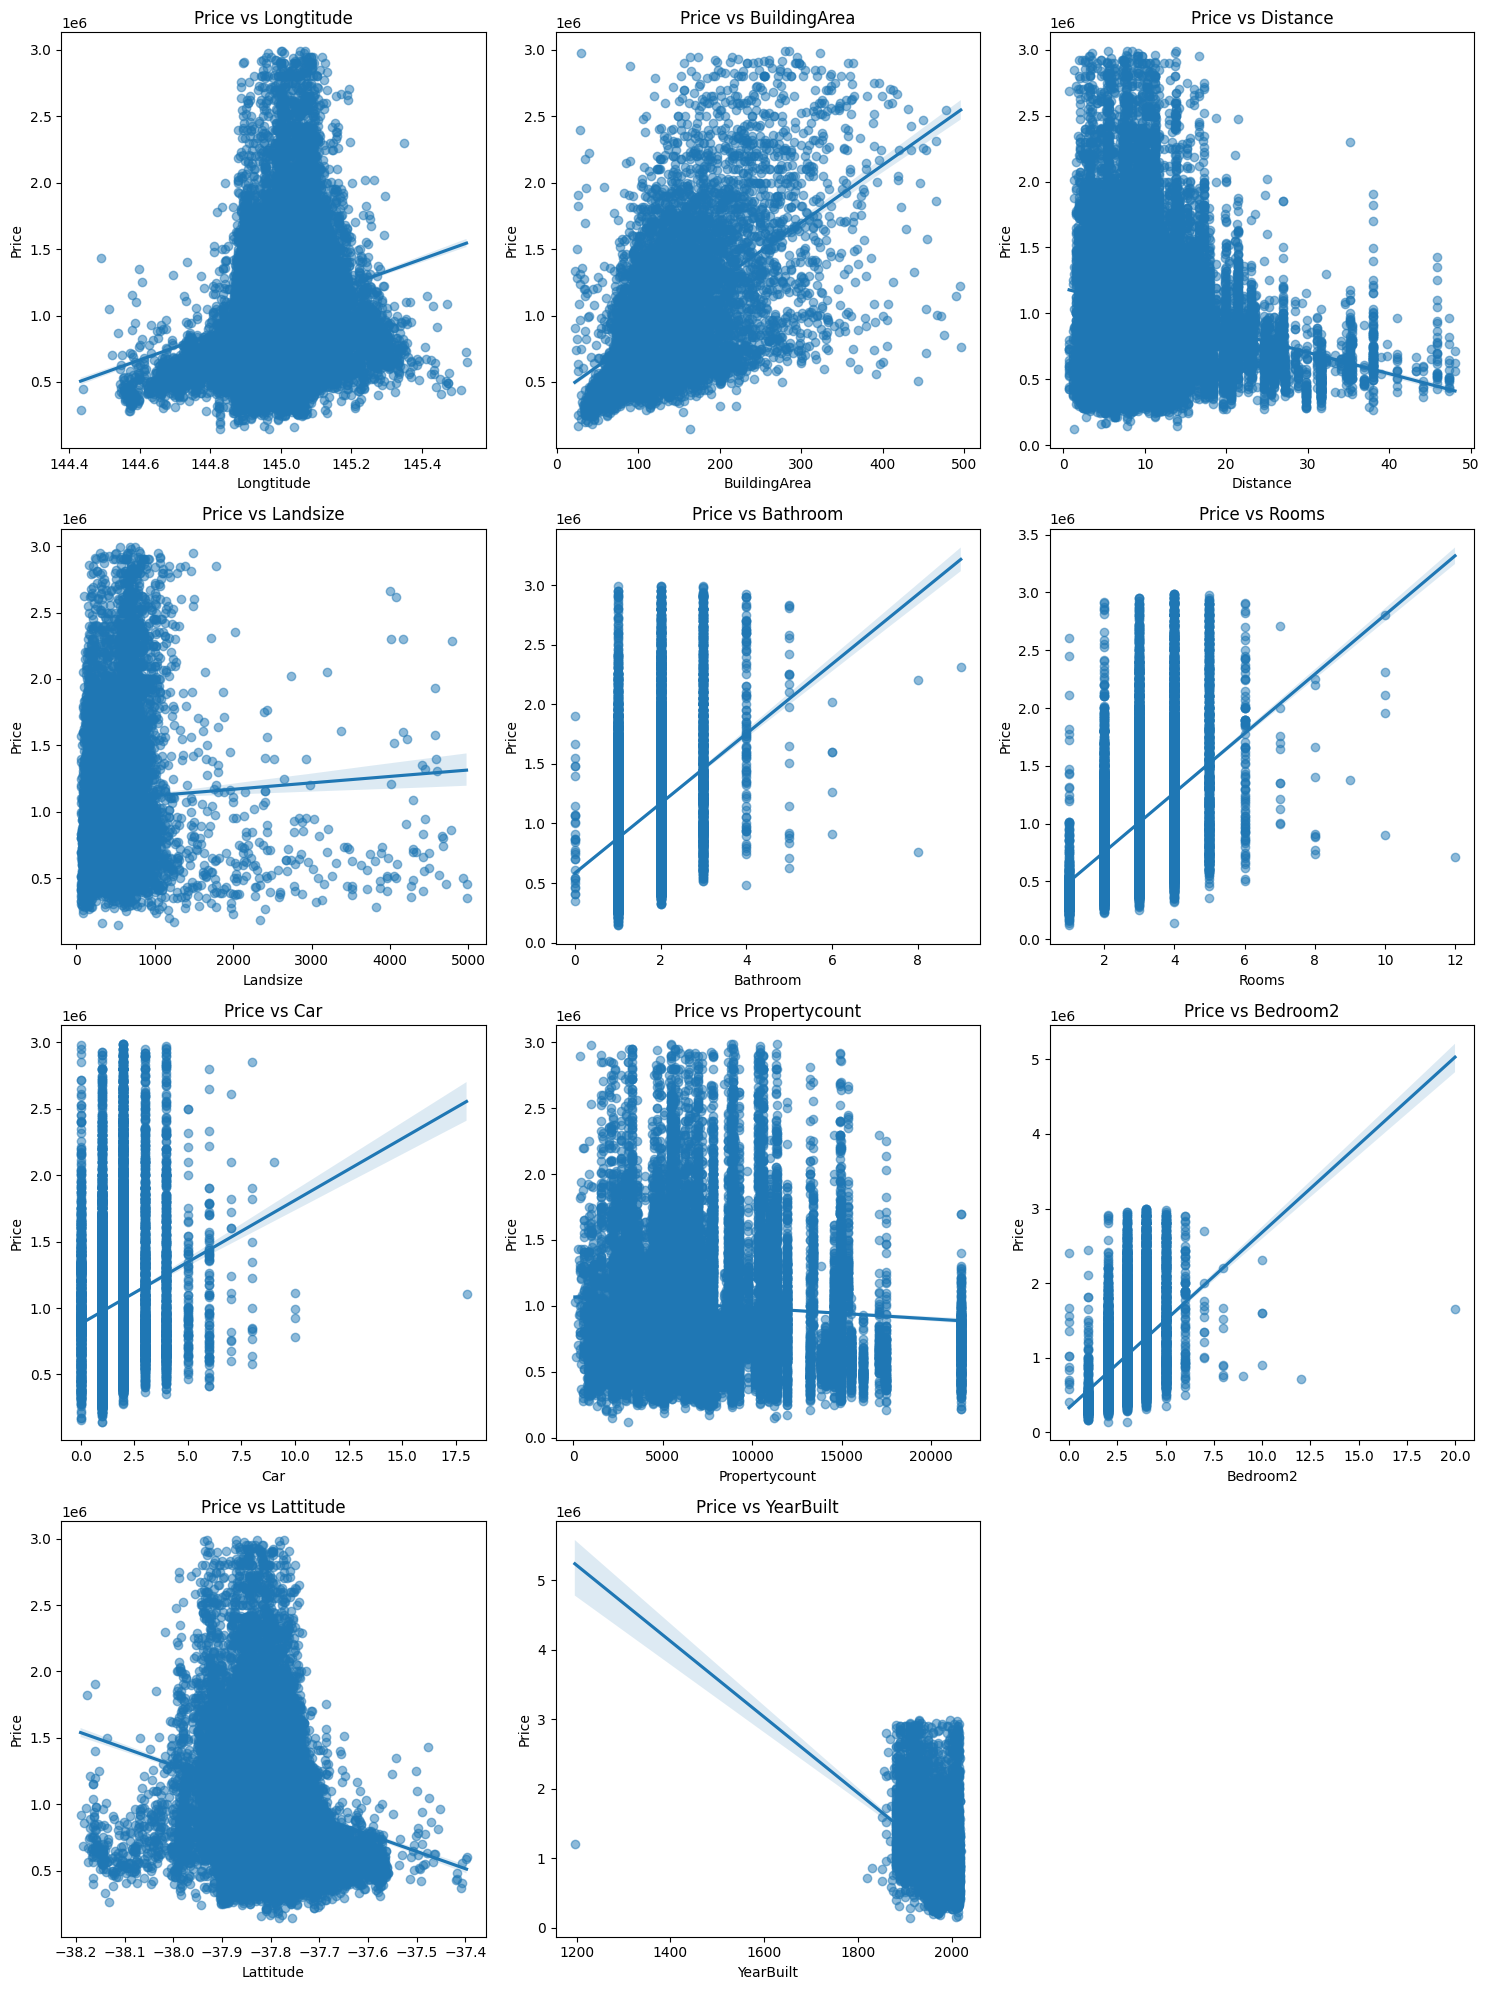

In [47]:

def analyze_bivariate_relationships(df, target="Price"):
    """Genera gráficos de dispersión con regresión para analizar relaciones con la variable objetivo."""

    num_cols = [col for col in df.select_dtypes(include=["number"]).columns if col != target]
    n = len(num_cols)

    fig, axes = plt.subplots(nrows=(n // 3) + 1, ncols=3, figsize=(15, 5 * ((n // 3) + 1)))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.regplot(data=df, x=col, y=target, ax=axes[i], scatter_kws={"alpha": 0.5})
        axes[i].set_title(f"{target} vs {col}")

    # Ocultar ejes vacíos si hay menos de 3 columnas
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Ejecutar con tus datos
analyze_bivariate_relationships(melbourne_df, target="Price")


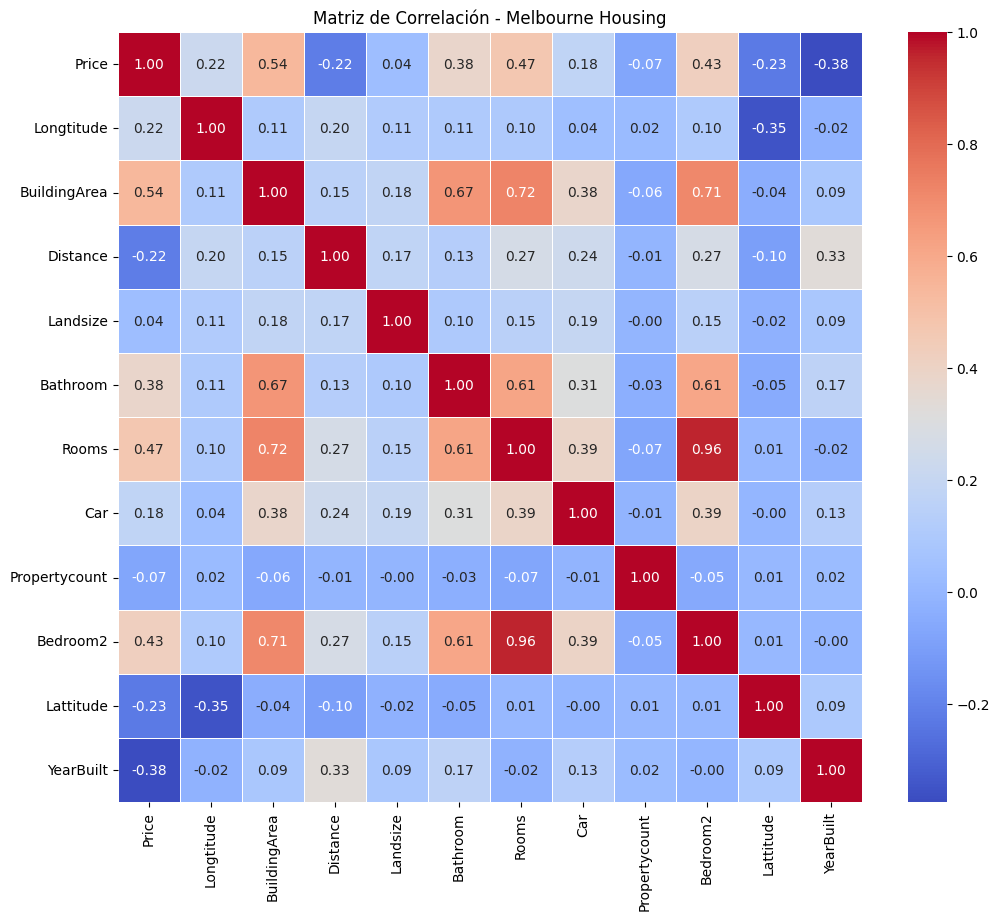

In [48]:
cols = melbourne_df.columns.tolist()
cols.insert(0, cols.pop(cols.index("Price")))  # Mueve "Price" a la primera posición
melbourne_df = melbourne_df.reindex(columns=cols)

# Calcular la matriz de correlación
melbourne_corr = melbourne_df.corr(numeric_only=True)

# Graficar la matriz de correlación
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(melbourne_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=ax)
plt.title("Matriz de Correlación - Melbourne Housing")
plt.show()

### Target vs Categorical

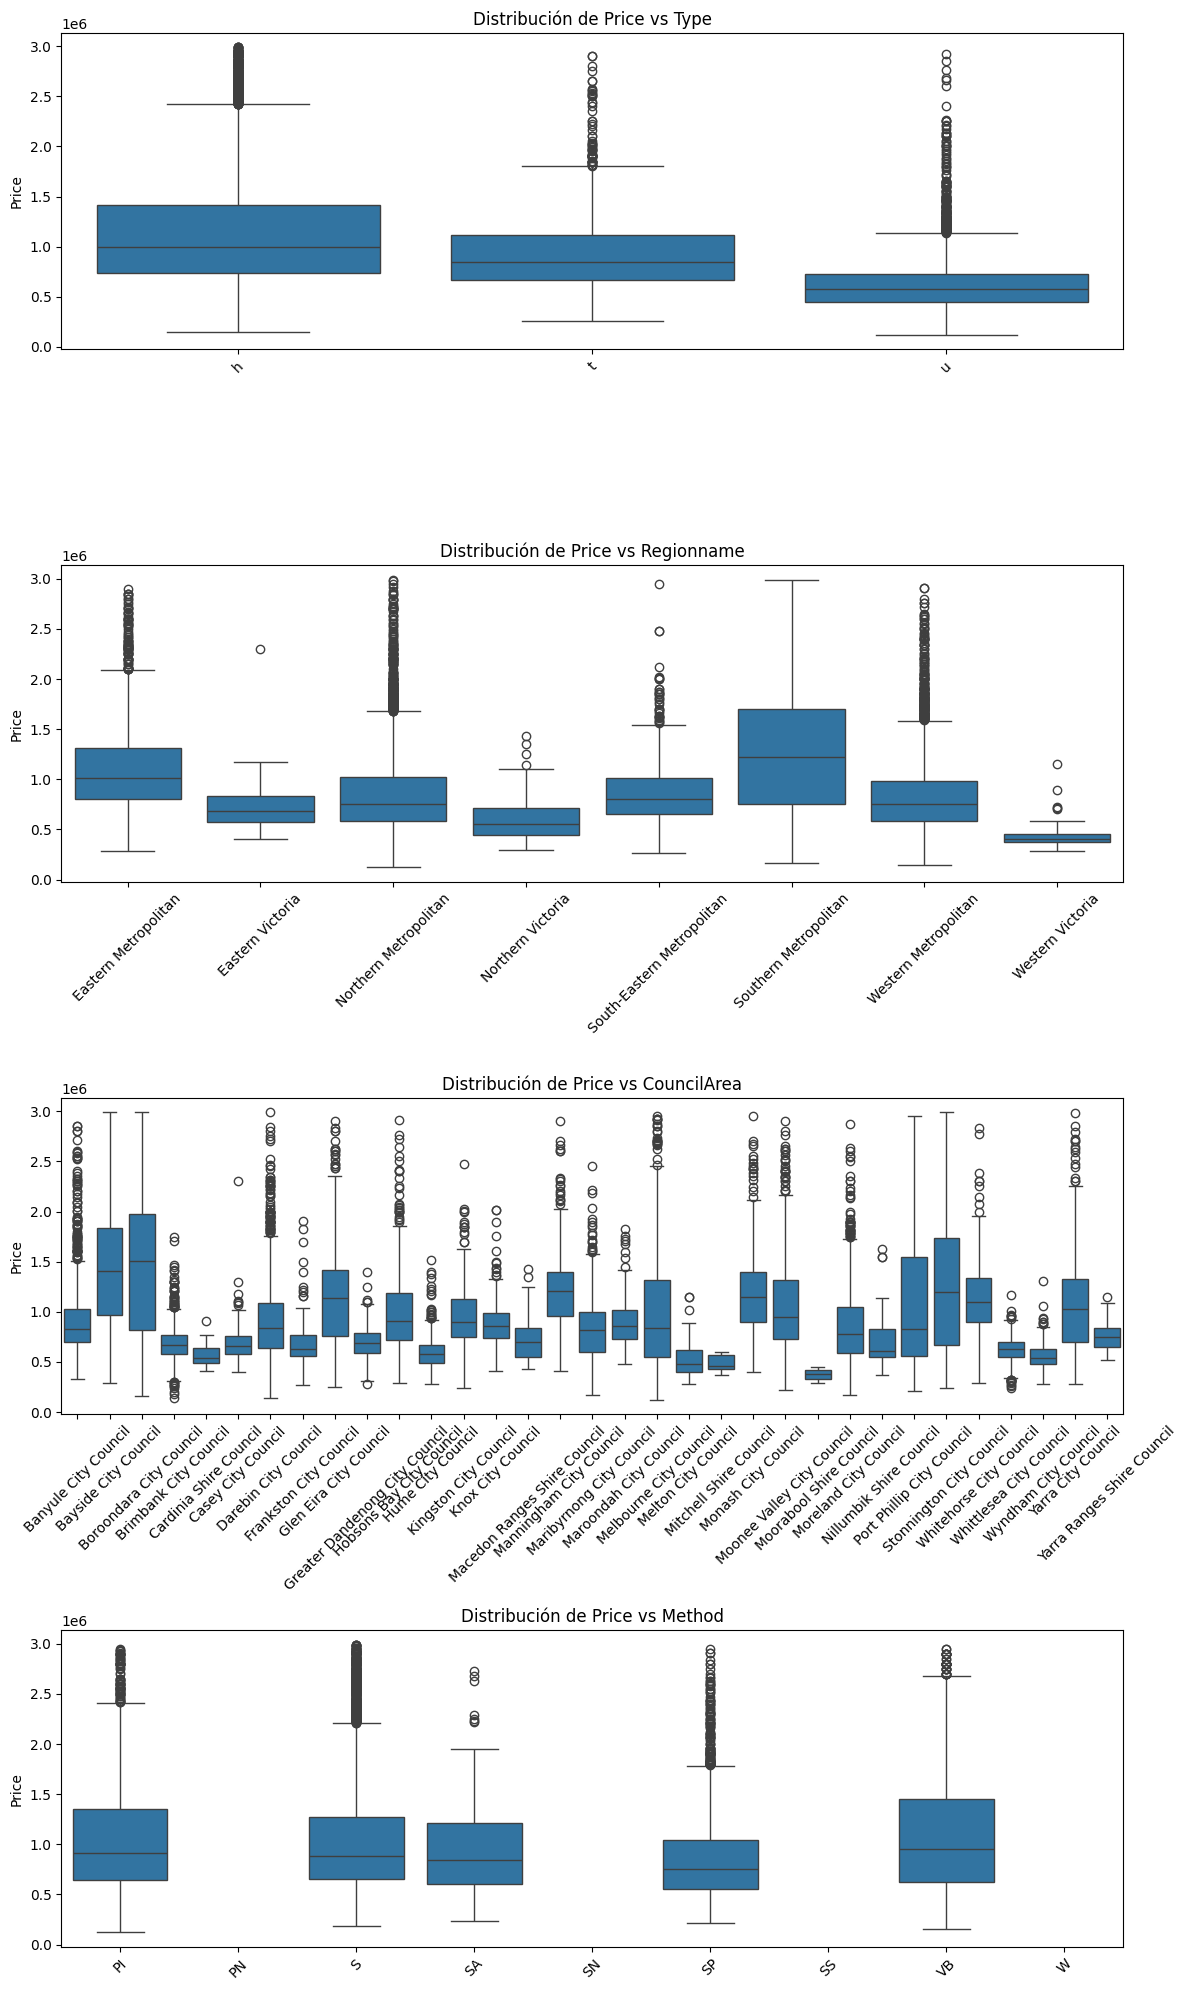

In [49]:
cat_cols = ["Type", "Regionname", "CouncilArea", "Method"]

# Filtrar solo las columnas categóricas que existen en el dataset
cat_cols = [col for col in cat_cols if col in melbourne_df.columns]

# Limpiar datos: eliminar filas con NaN en las columnas seleccionadas
melbourne_df = melbourne_df.dropna(subset=cat_cols + ["Price"])

# Configurar subgráficos
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(12, 5 * len(cat_cols)))

if len(cat_cols) == 1:
    axes = [axes]  # Convertir en lista si hay un solo gráfico

# Crear boxplots para cada variable categórica
for i, col in enumerate(cat_cols):
    sns.boxplot(x=melbourne_df[col], y=melbourne_df["Price"], ax=axes[i])
    axes[i].set_title(f"Distribución de Price vs {col}")
    axes[i].set_xlabel("")  # Ocultar etiquetas del eje X
    axes[i].tick_params(axis="x", rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad

plt.tight_layout()
plt.show()


No se graficó contra Address, Suburb, PostCode y SellerG debido a la gran cantidad de valores únicos que no permiten ver la grafica. Además son variables que eliminaremos más adelante

## Análisis Multivariable

### Variables numéricas vs numéricas

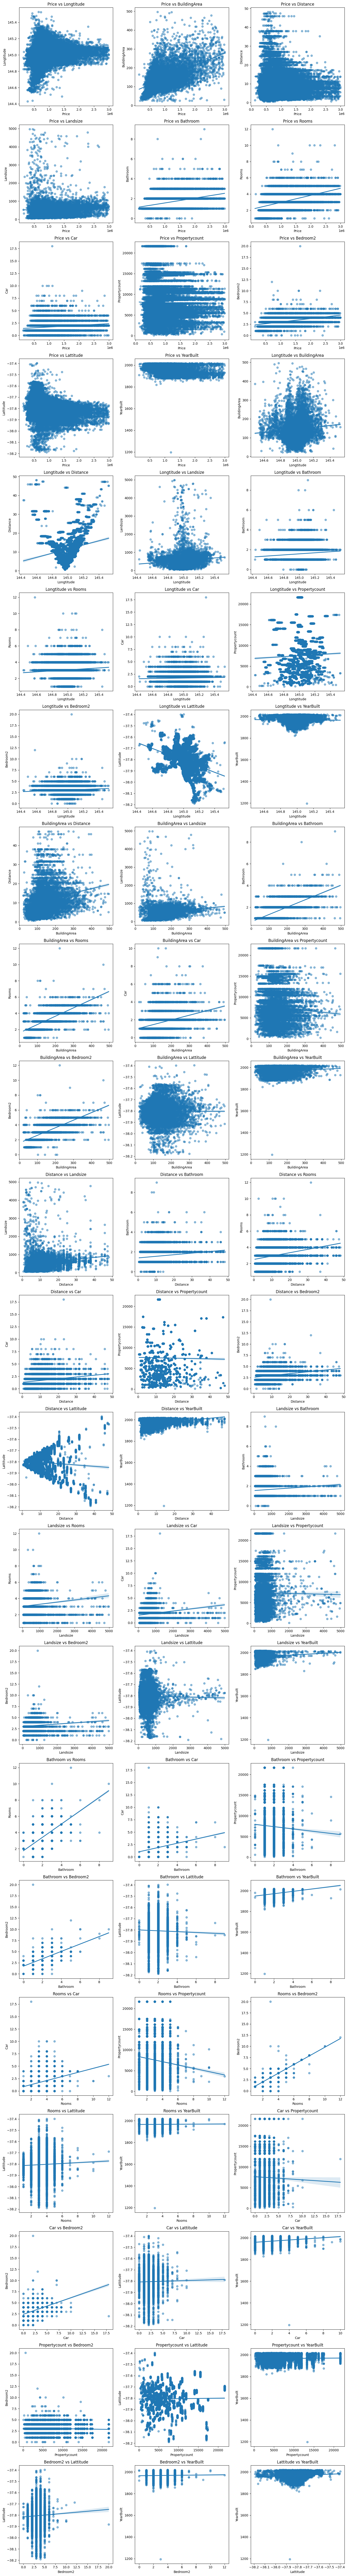

In [50]:
def analyze_all_numeric_relationships(df):
    """Genera gráficos de dispersión con regresión para todas las combinaciones de variables numéricas."""

    num_cols = df.select_dtypes(include=["number"]).columns.tolist()
    pairs = list(itertools.combinations(num_cols, 2))  # Todas las combinaciones posibles

    n = len(pairs)
    fig, axes = plt.subplots(nrows=(n // 3) + 1, ncols=3, figsize=(15, 5 * ((n // 3) + 1)))
    axes = axes.flatten()

    for i, (col_x, col_y) in enumerate(pairs):
        sns.regplot(data=df, x=col_x, y=col_y, ax=axes[i], scatter_kws={"alpha": 0.5})
        axes[i].set_title(f"{col_x} vs {col_y}")

    # Ocultar ejes vacíos si hay menos de 3 combinaciones
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Ejecutar con tus datos
analyze_all_numeric_relationships(melbourne_df)

## Variables categóricas vs categóricas

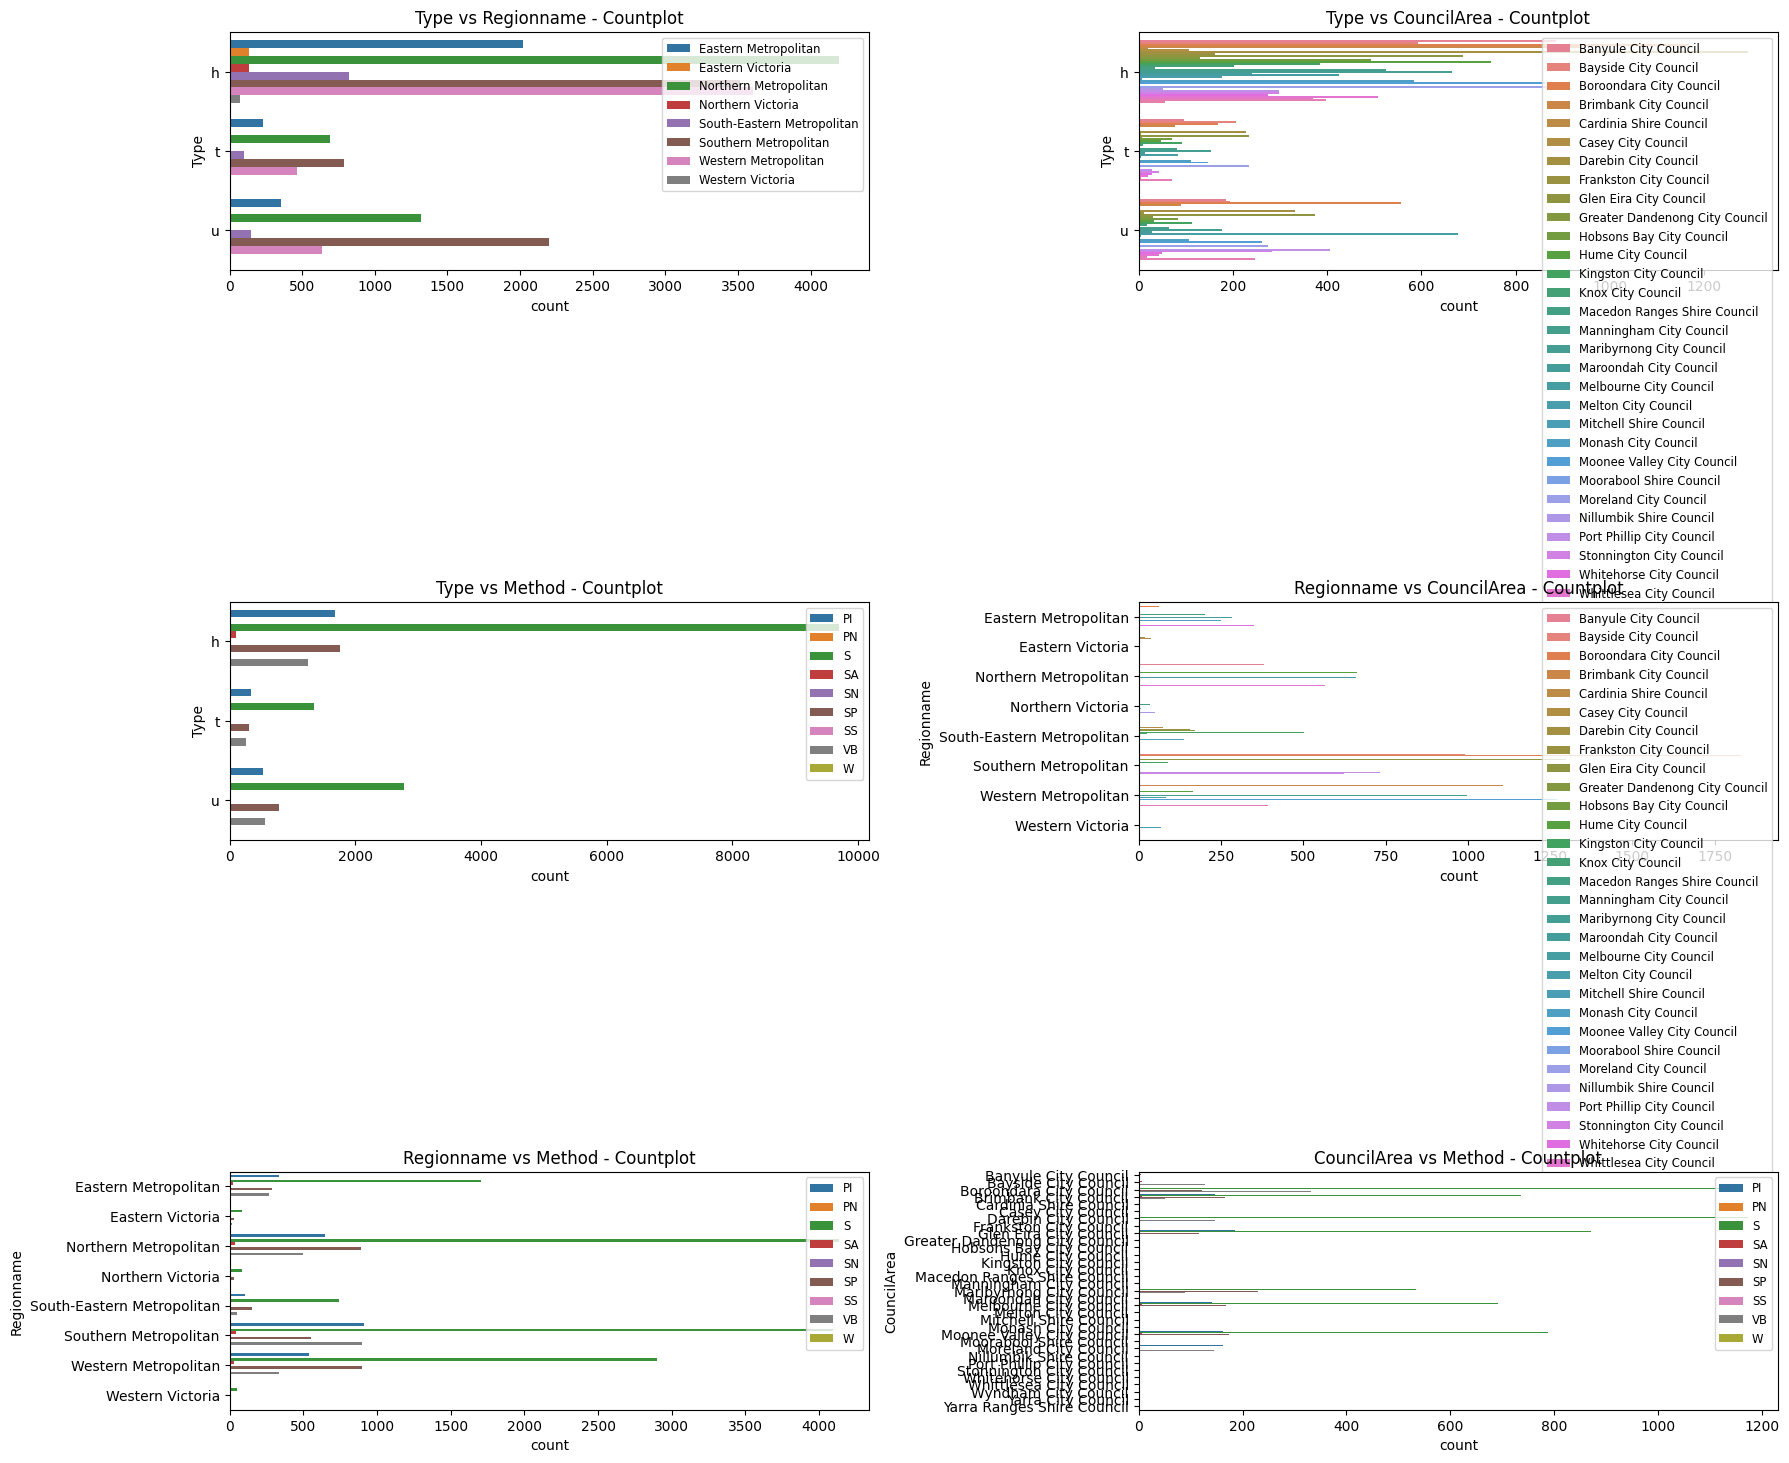

In [51]:
# Definir las columnas categóricas
cat_cols = ["Type", "Regionname", "CouncilArea", "Method"]

# Filtrar solo las columnas categóricas que existen en el dataset
cat_cols = [col for col in cat_cols if col in melbourne_df.columns]

# Eliminar filas con NaN en estas columnas
melbourne_df = melbourne_df.dropna(subset=cat_cols)

# Obtener todas las combinaciones posibles de variables categóricas
cat_combinations = list(itertools.combinations(cat_cols, 2))

# Configurar subgráficos
num_plots = len(cat_combinations)
fig, axes = plt.subplots(nrows=(num_plots // 2) + 1, ncols=2, figsize=(18, 5 * ((num_plots // 2) + 1)))
axes = axes.flatten()

# Graficar cada combinación de variables categóricas
for i, (col1, col2) in enumerate(cat_combinations):
    top_values = melbourne_df[col1].value_counts().index[:10]  # Tomar solo las 10 categorías más comunes
    subset_df = melbourne_df[melbourne_df[col1].isin(top_values)]  # Filtrar solo esas categorías
    
    sns.countplot(data=subset_df, y=col1, hue=col2, ax=axes[i])  # Graficar barras horizontales
    axes[i].set_title(f"{col1} vs {col2} - Countplot")
    axes[i].legend(loc="upper right", fontsize="small")  # Reducir tamaño de la leyenda

# Ocultar ejes vacíos si hay menos gráficos que subgráficos creados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Conclusiones

### Este análisis se enfocó en explorar las relaciones entre variables en el dataset melbourne_df, centrándose en los factores que pueden influir en los precios de las propiedades y su comportamiento en el mercado.
- Se observó que algunas variables numéricas tienen una relación más fuerte con el precio, mientras que otras no muestran una correlación clara.
- Se graficó el precio en función de variables como Type, Regionname, CouncilArea y Method usando boxplots. Cocnluyendo así que el tipo de propiedad (Type) tiene un impacto significativo en el precio, con diferencias claras entre casas y departamentos.
- Se exploraron las relaciones entre variables categóricas mediante gráficos de barras.